In [ ]:
import pandas as pd
df = pd.read_csv("data/Version1.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Version1.csv'

In [2]:
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns) #identifying categorical columns

Index(['Gender', 'Location', 'Education', 'Occupation', 'Primary_App',
       'Secondary_Apps', 'Usage_Frequency', 'Daily_Usage_Time',
       'Reason_for_Using', 'Challenges', 'Desired_Features',
       'Preferred_Communication', 'Partner_Priorities'],
      dtype='object')


In [ ]:
for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 50) #checking unique values

Unique values in 'Gender':
['Non-binary' 'Female' 'Male']
--------------------------------------------------
Unique values in 'Location':
['Bangalore' 'Delhi' 'Kolkata' 'Mumbai' 'Chennai' 'Pune' 'Hyderabad']
--------------------------------------------------
Unique values in 'Education':
['Undergraduate' 'Graduate' 'Postgraduate']
--------------------------------------------------
Unique values in 'Occupation':
['Freelancer' 'Part-time Job' 'Intern' 'Full-time Job' 'Student']
--------------------------------------------------
Unique values in 'Primary_App':
['Hinge' nan 'OkCupid' 'Tinder' 'Bumble']
--------------------------------------------------
Unique values in 'Secondary_Apps':
['Hinge' 'OkCupid' nan 'Tinder' 'Bumble']
--------------------------------------------------
Unique values in 'Usage_Frequency':
['Monthly' 'Weekly' 'Daily']
--------------------------------------------------
Unique values in 'Daily_Usage_Time':
['1 hour' '30 minutes' '2 hours' '1.5 hours' '3 hours']
------

In [ ]:
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.strip().str.lower()) #normalizing case and removing white space

In [6]:
for col in categorical_columns:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print("-" * 50)

Value counts for 'Gender':
Gender
female        176
male          171
non-binary    153
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Location':
Location
mumbai       82
delhi        76
kolkata      76
bangalore    69
pune         67
chennai      66
hyderabad    64
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Education':
Education
graduate         169
undergraduate    166
postgraduate     165
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Occupation':
Occupation
student          106
intern           105
freelancer       103
full-time job    100
part-time job     86
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Primary_App':
Primary_App
okcupid    118
hinge      106
bumble      93
tinder      76
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Secon

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [ ]:
print("Missing Values Per Column:")
print(df.isnull().sum()) #check missing values

Missing Values Per Column:
User_ID                      0
Age                          0
Gender                       0
Location                     0
Education                    0
Occupation                   0
Primary_App                107
Secondary_Apps             114
Usage_Frequency              0
Daily_Usage_Time             0
Reason_for_Using             0
Satisfaction                 0
Challenges                 117
Desired_Features             0
Preferred_Communication      0
Partner_Priorities           0
dtype: int64


In [ ]:
df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True) #filling numerical columns with their median

In [12]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_57086/4072275310.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [13]:
df['missing_flag'] = df.isnull().sum(axis=1)

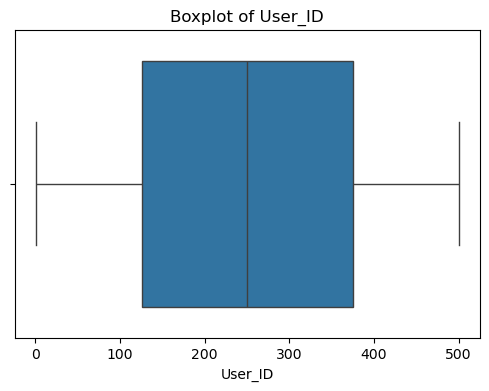

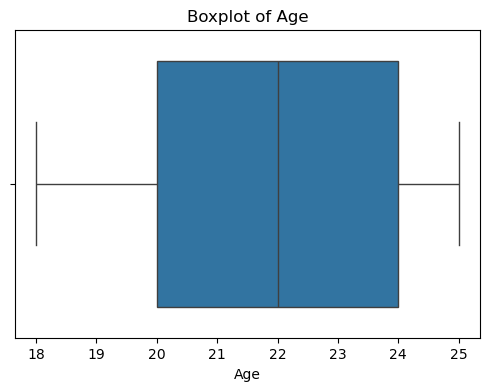

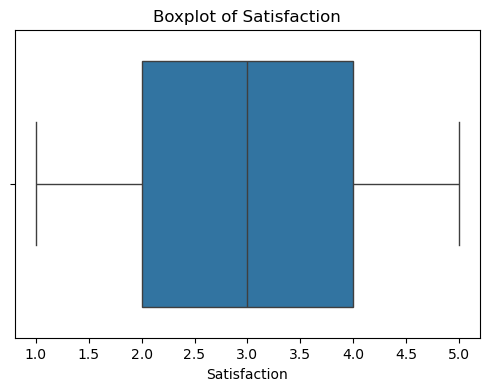

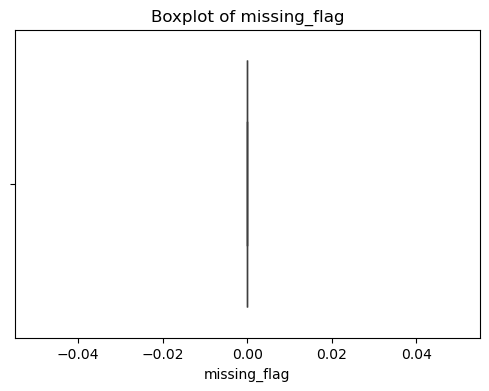

In [ ]:
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show() #checking for outliers

In [ ]:
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] #removing outliers